* Import Libraries

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 12,8
from matplotlib.pyplot import figure
import seaborn as sns

In [3]:
### Read in the data
df = pd.read_csv('movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [14]:
### lets see if there is any missing data
df.isnull().sum() * 100 / len(df)

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

### Data Cleaning

In [26]:
df['year_correct'] = (df['released'].str.split(',').str[1].str.split(' ').str[1])

In [47]:
df.sort_values(by=['gross'], ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


#### Filling in the missing values

In [63]:
df['rating'] = df['rating'].fillna(df['rating'].mode().values[0])
# df['score'] = df['score'].fillna(df['score'].median())
# df['votes'] = df['votes'].fillna(df['votes'].median())

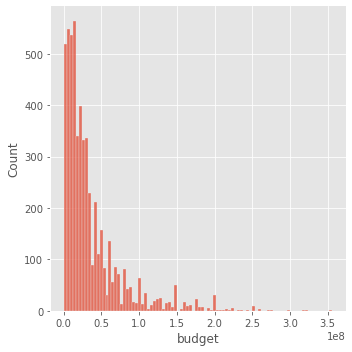

In [64]:
sns.displot(df['budget']) 
## left skewed, hence we will fill the missing data with median

In [65]:
df['budget'] = df['budget'].fillna(df['budget'].median())

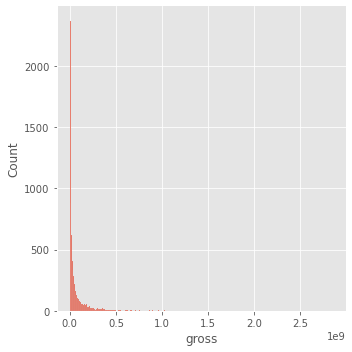

In [66]:
sns.displot(df['gross']) 
df['gross'] = df['gross'].fillna(df['gross'].median())

In [68]:
df = df.dropna()

#### Standardizing the data

In [72]:
df['budget'] = df['budget'].astype('int64')

<ipython-input-72-3bc4c590d324>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')


In [74]:
df['gross'] = df['gross'].astype('int64')

<ipython-input-74-80a250f85531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')


### Correlations / EDA

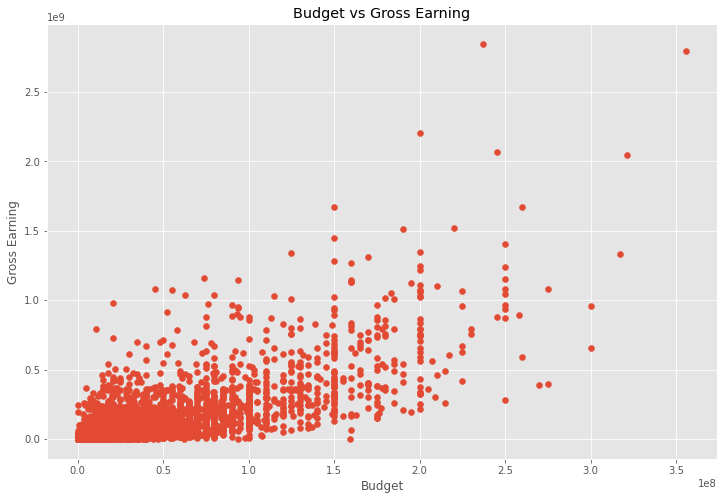

In [92]:
### scatter plot for budget vs gross
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()

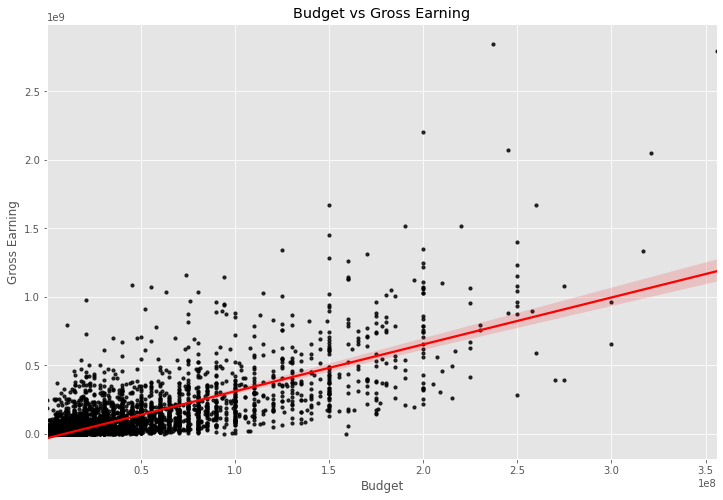

In [98]:
sns.regplot(x = df['budget'], y = df['gross'], 
           scatter_kws={'color':'black', 's':10}, 
           line_kws={'color':'red'})
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()

#### let's start looking at the correlation

In [99]:
# Correlation Matrix between all numeric columns

df.corr() # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.100629,0.220880,0.291937,0.258431,0.119354
score,0.100629,1.000000,0.411727,0.061637,0.186558,0.401209
votes,0.220880,0.411727,1.000000,0.459880,0.631473,0.308876
budget,0.291937,0.061637,0.459880,1.000000,0.745716,0.272763
gross,0.258431,0.186558,0.631473,0.745716,1.000000,0.244045
runtime,0.119354,0.401209,0.308876,0.272763,0.244045,1.000000


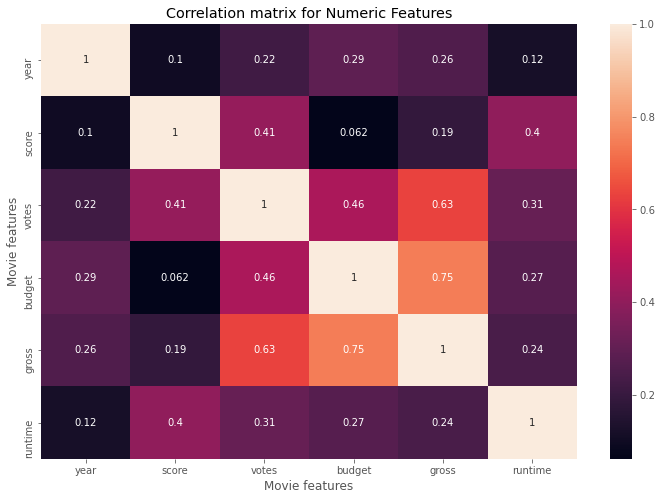

In [101]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

### high correlation b/w budget and gross

In [102]:
df.corr().unstack()

year     year       1.000000
         score      0.100629
         votes      0.220880
         budget     0.291937
         gross      0.258431
         runtime    0.119354
score    year       0.100629
         score      1.000000
         votes      0.411727
         budget     0.061637
         gross      0.186558
         runtime    0.401209
votes    year       0.220880
         score      0.411727
         votes      1.000000
         budget     0.459880
         gross      0.631473
         runtime    0.308876
budget   year       0.291937
         score      0.061637
         votes      0.459880
         budget     1.000000
         gross      0.745716
         runtime    0.272763
gross    year       0.258431
         score      0.186558
         votes      0.631473
         budget     0.745716
         gross      1.000000
         runtime    0.244045
runtime  year       0.119354
         score      0.401209
         votes      0.308876
         budget     0.272763
         gross

In [106]:
corr_pairs = df.corr().unstack().sort_values()
corr_pairs

budget   score      0.061637
score    budget     0.061637
year     score      0.100629
score    year       0.100629
runtime  year       0.119354
year     runtime    0.119354
gross    score      0.186558
score    gross      0.186558
year     votes      0.220880
votes    year       0.220880
gross    runtime    0.244045
runtime  gross      0.244045
gross    year       0.258431
year     gross      0.258431
runtime  budget     0.272763
budget   runtime    0.272763
year     budget     0.291937
budget   year       0.291937
votes    runtime    0.308876
runtime  votes      0.308876
         score      0.401209
score    runtime    0.401209
votes    score      0.411727
score    votes      0.411727
votes    budget     0.459880
budget   votes      0.459880
gross    votes      0.631473
votes    gross      0.631473
budget   gross      0.745716
gross    budget     0.745716
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [108]:
corr_pairs[(corr_pairs>0.4)&(corr_pairs<1)]

runtime  score      0.401209
score    runtime    0.401209
votes    score      0.411727
score    votes      0.411727
votes    budget     0.459880
budget   votes      0.459880
gross    votes      0.631473
votes    gross      0.631473
budget   gross      0.745716
gross    budget     0.745716
dtype: float64

##### Votes and Budget have high correlation with Gross Earning

#### checking out the company column
 - calculating revenue earned by every movie
 - will only analyze companies which have produced more than 10 movies
 - finding top 10 companies

In [111]:
df['revenue'] = df['gross'] - df['budget']

<ipython-input-111-6741daa26703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['gross'] - df['budget']


In [150]:
#### total revenue earned by every company

company_revenues = df.groupby('company').sum()['revenue']
company_revenues = pd.DataFrame(company_revenues).reset_index()
company_revenues

,company,revenue
0,"""DIA"" Productions GmbH & Co. KG",8350926
1,"""Weathering With You"" Film Partners",182357467
2,.406 Production,-239420
3,1+2 Seisaku Iinkai,-19303782
4,10 West Studios,-19685094
...,...,...
2348,i am OTHER,10986781
2349,i5 Films,7031529
2350,iDeal Partners Film Fund,-19993697
2351,micro_scope,299598


In [152]:
### total movies produced by every company

company_counts = df['company'].value_counts()
company_counts = pd.DataFrame(company_counts).reset_index()
company_counts.columns = ['company', 'count']
company_counts

,company,count
0,Universal Pictures,377
1,Warner Bros.,334
2,Columbia Pictures,332
3,Paramount Pictures,320
4,Twentieth Century Fox,239
...,...,...
2348,Bob-Bea Productions,1
2349,Blue Train Productions,1
2350,Lions Gate Entertainment,1
2351,Some Film,1


In [161]:
company_df = company_revenues.merge(company_counts, on='company', how='left')

In [163]:
#### filtering out companies which have produced less than 10 movies
company_df = company_df[company_df['count']>10]

In [164]:
#### calculating revenue earned per movie produced by every company
company_df['rev_per_mov'] = company_df['revenue'] / company_df['count']

<ipython-input-164-0e754e52544d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['rev_per_mov'] = company_df['revenue'] / company_df['count']


In [167]:
company_df.sort_values('rev_per_mov', ascending=False).head(10)

,company,revenue,count,rev_per_mov
1581,Marvel Studios,12401592411,12,1.033466e+09
1828,Pixar Animation Studios,6130344526,12,5.108620e+08
873,DreamWorks Animation,8529612858,28,3.046290e+08
2284,Walt Disney Animation Studios,4665509051,17,2.744417e+08
2285,Walt Disney Pictures,25595187792,123,2.080910e+08
2222,Twentieth Century Fox,28163506551,239,1.178389e+08
2288,Warner Bros.,36225827563,334,1.084606e+08
875,Dreamworks Pictures,7653241081,76,1.007005e+08
2250,Universal Pictures,35581164646,377,9.437975e+07
2116,Summit Entertainment,5656949838,60,9.428250e+07


##### Top 10 companies